Make sure to put the train.csv and test.csv in a folder called data in the home directory.

Ankith: Neural network

Jenny: Logistic Regression

Vedu: Random Forest

Ethan: Support Vector Machines

Vidit: k-Nearest Neighbors

In [82]:
%matplotlib inline
# Pandas is a nice utilitiy that enables some easy data manipulation, especially from a csv
import pandas as pd
# Numpy lets us work with arrays
import numpy as np
import random
# Sklearn provides various modules with a common API
from sklearn import svm, tree, neighbors, neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Load in Dataset Titanic Kaggle

In [83]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

train data

In [84]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test data

In [85]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
print(train_data.columns[train_data.isna().any()].tolist())

['Age', 'Cabin', 'Embarked']


In [87]:
# Set seed for reproducibility
random.seed(100)
np.random.seed(100)

train_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

test_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

train_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(), 'Embarked': train_data['Embarked'].mode()[0]}
test_nan_map = {'Age': test_data['Age'].mean(), 'Fare': test_data['Fare'].mean(), 'Embarked': test_data['Embarked'].mode()[0]}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)

columns_map = {'Embarked': {'C': 0, 'Q': 1, 'S': 2}, 'Sex': {'male': 0, 'female': 1}}
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)

X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=10)

In [88]:
print(X_train.head())
print(y_train.head())
print(test_data.head())
print(f"Test Mean: {y_test.mean()}")
print(f"Train Mean: {y_train.mean()}")

             Pclass  Sex        Age  SibSp  Parch    Fare  Embarked
PassengerId                                                        
464               2    0  48.000000      0      0  13.000         2
160               3    0  29.699118      8      2  69.550         2
48                3    1  29.699118      0      0   7.750         1
403               3    1  21.000000      1      0   9.825         2
619               2    1   4.000000      2      1  39.000         2
PassengerId
464    0
160    0
48     1
403    0
619    1
Name: Survived, dtype: int64
             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
892               3    0  34.5      0      0   7.8292         1
893               3    1  47.0      1      0   7.0000         2
894               2    0  62.0      0      0   9.6875         1
895               3    0  27.0      0      0   8.6625         2
896               3    1  22.0      1      1  12.2875 

In [89]:
train_data.columns[train_data.isna().any()].tolist()
train_data[train_data['Embarked'].isna() == True]
train_data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


check if there are any missing values

In [90]:
print(f'\nNull Values in Training \n{train_data.isnull().sum()}')
print(f'\nNull Values in Testing \n{test_data.isnull().sum()}')

print(f'\nDuplicated values in train {train_data.duplicated().sum()}')
print(f'Duplicated values in test {test_data.duplicated().sum()}')


Null Values in Training 
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Null Values in Testing 
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Duplicated values in train 111
Duplicated values in test 38


In [91]:

def save_predictions_to_csv(test_data, test_predictions, filename: str = "titanic_prediction_group_4_name.csv") -> None:
    """
    Save the predictions to a CSV file.

    Args:
    - predictions (list): List of predictions to save.
    - filename (str, optional): Name of the CSV file to save to. Defaults to "titanic_predictions_group_4_name.csv".

    Returns:
    None
    """
    # include passenger id
    # df = pd.DataFrame(predictions, columns=["PassengerId", "Survived"])
    # df.to_csv(filename, index=False)
    passid_prediction = {'PassengerId': test_data.index.values, 'Survived': test_predictions}
    df_predictions = pd.DataFrame(passid_prediction)
    df_predictions.to_csv(filename, index=False)

In [92]:
# imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [93]:
# tune hyperparams via grid search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], # number of trees
    'max_depth': [None, 10, 20, 30], # max depth of tree
    'min_samples_split': [2, 4, 6, 8, 10], # min number of samples to split a node
    'min_samples_leaf': [1, 2, 3, 4, 5] # min number of samples in a leaf
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, 
                            param_grid=param_grid, 
                            cv=5, 
                            n_jobs=-1, 
                            verbose=2, 
                            scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Params: {best_params}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END 

In [94]:
# build clf
clf = RandomForestClassifier(**best_params, random_state=10)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=200, random_state=10)

In [95]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.02%



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       191
           1       0.75      0.69      0.72       104

    accuracy                           0.81       295
   macro avg       0.79      0.78      0.79       295
weighted avg       0.81      0.81      0.81       295



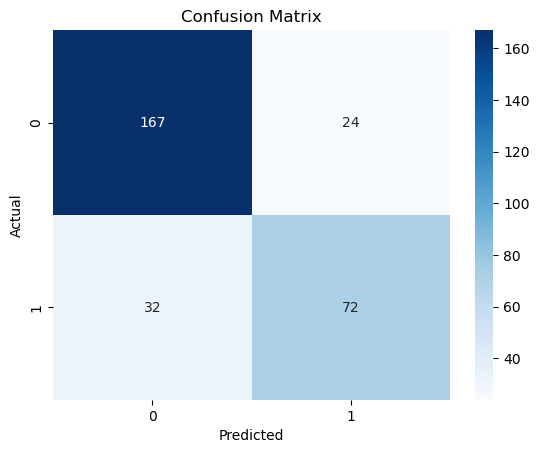

In [96]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
test_predictions = clf.predict(test_data)
# passid_prediction = {'PassengerId': test_data.index.values, 'Survived': test_predictions}
# df_predictions = pd.DataFrame(passid_prediction)
# df_predictions.to_csv("titanic_predictions_vedu_random_forest.csv", index=False)
save_predictions_to_csv(test_data, test_predictions, "titanic_predictions_vedu_random_forest.csv")

# save_predictions_to_csv(passid_prediction, "titanic_predictions_vedu_random_forest.csv")

Text(0.5, 0, 'Survived')

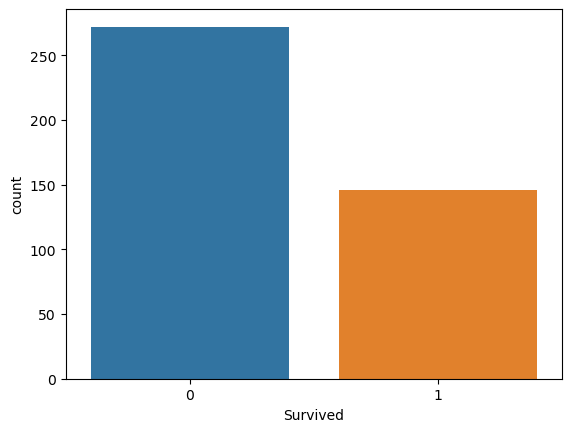

In [98]:
# visualizae predicted values
sns.countplot(x=test_predictions, data=train_data)
plt.xlabel('Survived')